In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
x_train.shape  

(50000, 32, 32, 3)

In [6]:
 x_test.shape

(10000, 32, 32, 3)

In [7]:
Temp_var=datasets.cifar10.load_data()

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

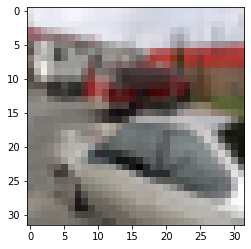

In [10]:
plt.imshow(x_train[49999])

In [11]:
y_train=y_train.reshape(-1,)

In [12]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

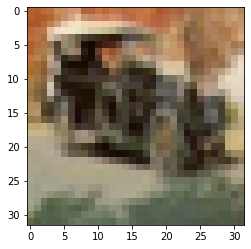

In [14]:
plt.imshow(x_train[301])

y[301]

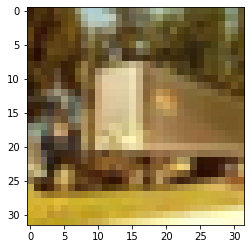

In [15]:
plt.imshow(x_train[307])

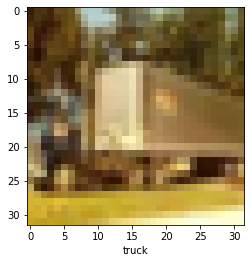

In [16]:
plt.xlabel(classes[y_train[307]])
plt.imshow(x_train[307])

In [17]:
x_train=x_train /255
x_test=x_test /255


In [18]:
 ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8113 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6225 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5398 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4805 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4304 - accuracy: 0.4958


NameError: name 'classification_report' is not defined

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48      1000
           1       0.45      0.78      0.57      1000
           2       0.36      0.34      0.35      1000
           3       0.36      0.35      0.35      1000
           4       0.41      0.46      0.43      1000
           5       0.50      0.27      0.35      1000
           6       0.43      0.69      0.53      1000
           7       0.66      0.42      0.52      1000
           8       0.60      0.62      0.61      1000
           9       0.54      0.50      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4397 - accuracy: 0.4835
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0932 - accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9720 - accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8839 - accuracy: 0.6932
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8160 - accuracy: 0.7166
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7592 - accuracy: 0.7357
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7111 - accuracy: 0.7519
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6675 - accuracy: 0.7677
Epoch 9/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6217 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 21s 14m

In [24]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0190 - accuracy: 0.6775


[1.0189532041549683, 0.6775000095367432]

In [28]:
cnn.predict(x_test)

313/313 [==============================] - 1s 4ms/step


array([[1.69711093e-05, 7.01719691e-05, 2.30483187e-04, ...,
        2.76771902e-06, 1.25825143e-04, 7.13122368e-04],
       [3.25196818e-03, 8.44660401e-01, 1.78523059e-03, ...,
        3.18615037e-07, 1.49306625e-01, 9.39886842e-04],
       [3.67236167e-01, 4.52614725e-02, 7.54904300e-02, ...,
        5.50502501e-02, 3.52378756e-01, 7.05680922e-02],
       ...,
       [4.92732543e-05, 8.34780678e-07, 4.18644249e-02, ...,
        3.41328494e-02, 3.21629052e-08, 1.06071975e-05],
       [1.84517726e-02, 4.79780249e-02, 9.11149720e-04, ...,
        7.15995338e-05, 2.29536863e-06, 9.81167657e-04],
       [7.51903499e-08, 5.39583211e-10, 8.78290336e-07, ...,
        9.98642027e-01, 2.02739003e-09, 8.86187790e-10]], dtype=float32)

In [30]:
cnn.predict(x_test[:2])

1/1 [==============================] - 0s 18ms/step


array([[1.6971093e-05, 7.0171896e-05, 2.3048319e-04, 8.2317173e-01,
        3.1811700e-04, 1.2227313e-02, 1.6312353e-01, 2.7677163e-06,
        1.2582503e-04, 7.1312202e-04],
       [3.2519626e-03, 8.4466058e-01, 1.7852284e-03, 3.1375748e-05,
        2.1941058e-05, 1.6150233e-07, 2.0471443e-06, 3.1861421e-07,
        1.4930651e-01, 9.3988609e-04]], dtype=float32)